In [2]:
import re
import jieba
import pandas as pd
import codecs
from opencc import OpenCC

sentment_table = pd.read_excel('./dictionary/emotion.xlsx')
sentment_table.drop(['Unnamed: 10','Unnamed: 11'],inplace=True,axis=1)
pos_table = pd.read_excel('./dictionary/emotion.xlsx','Sheet2')
neg_table = pd.read_excel('./dictionary/emotion.xlsx','Sheet3')

In [3]:
pos_dict = dict(zip(list(pos_table.word),list(pos_table.強度)))
neg_dict = dict(zip(list(neg_table.word),map(lambda a:a*(0-1),list(neg_table.強度)) ))
sentment_dict = {**pos_dict,**neg_dict}

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
    return False

for w in sentment_dict.keys():
    if is_number(w):
        pass
    else:
        jieba.suggest_freq(w,True)

stop_words = [re.findall(r'\S+',w)[0] for w in open('./dictionary/stopwords.txt',encoding='utf8').readlines() if len(re.findall(r'\S+',w))>0]

def sent2word(sentence,stop_words=stop_words):
    words = jieba.cut(sentence, HMM=False)
    words = [w for w in words if w not in stop_words]
    return words

def get_sentment(sent):
    tokens = sent2word(sent)
    score = 0
    countword = 0
    for w in tokens:        
        if w in sentment_dict.keys():
            score += sentment_dict[w]
            countword += 1
    if countword != 0:
        return score/countword
    else:
        return 0
    
cc = OpenCC('t2s')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Shaoting\AppData\Local\Temp\jieba.cache
Loading model cost 0.587 seconds.
Prefix dict has been built successfully.


0

In [21]:
def get_clean_paragraphs(text):    
        with codecs.open(text, 'r', 'utf-8') as f:
            paragraphs = f.read().split('\r\n\r\n')
        return paragraphs

novel1='./Dune series/merge.txt'
text=[]
paragraphs = get_clean_paragraphs(novel1)

for p in paragraphs:
    if p.find("保羅")!=-1:
        t=""
        t=cc.convert(p)
        m=get_sentment(t)
        if m!=0:
            text.append(m)


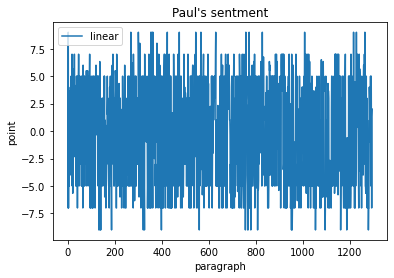

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, np.size(text), np.size(text))
plt.plot(x, text, label='linear')
plt.xlabel('paragraph')
plt.ylabel('point')
plt.title("Paul's sentment")
plt.legend()
plt.show()

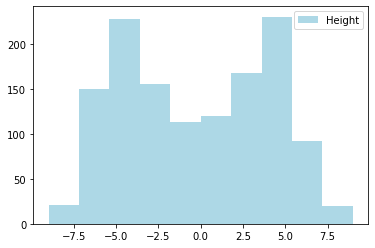

In [23]:
plt.hist(text, density=False, color = 'lightblue', cumulative = False, label = "Height")
plt.legend()
plt.xlabel('')
plt.show()